In [1]:
# Copyright (c) 2024 Rioborue Alexander Oghenerume. All rights reserved.
# This code cannot be used, modified, or distributed without permission.
from google.colab import files
uploaded = files.upload()

Saving Construction.xlsx to Construction.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, levene
import seaborn as sns
df = pd.read_excel("Construction.xlsx")
print(df.head())

    Sex Qualification     Experience  Score1  Score2  Score3  Score4  Score5  \
0  Male        Master  Under_10Years       2       2       3       3       3   
1  Male      Bachelor  Under_10Years       2       1       2       1       2   
2  Male        Master  Under_10Years       2       1       2       1       2   
3  Male      Bachelor  Under_10Years       1       1       2       1       2   
4  Male      Bachelor  Under_10Years       2       2       1       1       2   

   Score6  Score7  ...  Score18  Score19  Score20  Score21  Score22  Score23  \
0       2       1  ...        2        4        2        1        4        1   
1       2       3  ...        1        2        3        3        3        2   
2       1       3  ...        1        2        2        3        2        3   
3       2       2  ...        1        2        3        2        3        2   
4       2       1  ...        1        4        2        4        3        2   

   Score24  Score25  Score26  Score27 

In [3]:
missing_values = df.isnull().sum()
sex_distribution = df['Sex'].value_counts()
qualification_distribution = df['Qualification'].value_counts()
experience_distribution = df['Experience'].value_counts()
print("Frequency Distribution for Sex:")
print(sex_distribution)
print("\nFrequency Distribution for Qualification:")
print(qualification_distribution)
print("\nFrequency Distribution for Experience:")
print(experience_distribution)
print("\nMissing Values (if any):")
print(missing_values)

Frequency Distribution for Sex:
Sex
Female    1001
Male       595
Name: count, dtype: int64

Frequency Distribution for Qualification:
Qualification
Bachelor    1074
Master       522
Name: count, dtype: int64

Frequency Distribution for Experience:
Experience
Under_10Years    871
Over_10Years     725
Name: count, dtype: int64

Missing Values (if any):
Sex              0
Qualification    0
Experience       0
Score1           0
Score2           0
Score3           0
Score4           0
Score5           0
Score6           0
Score7           0
Score8           0
Score9           0
Score10          0
Score11          0
Score12          0
Score13          0
Score14          0
Score15          0
Score16          0
Score17          0
Score18          0
Score19          0
Score20          0
Score21          0
Score22          0
Score23          0
Score24          0
Score25          0
Score26          0
Score27          0
dtype: int64


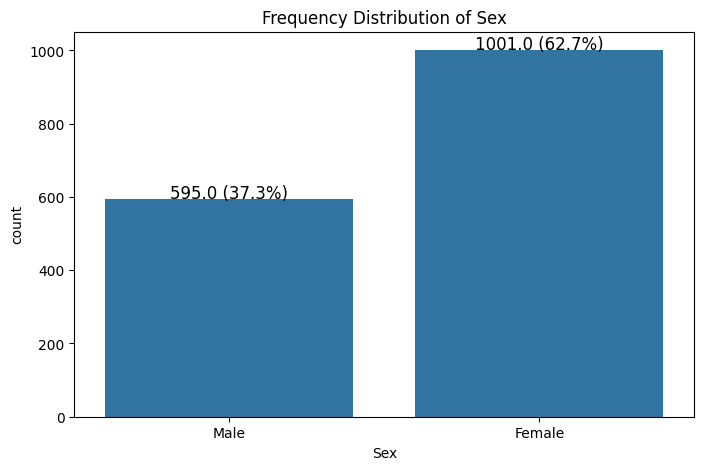

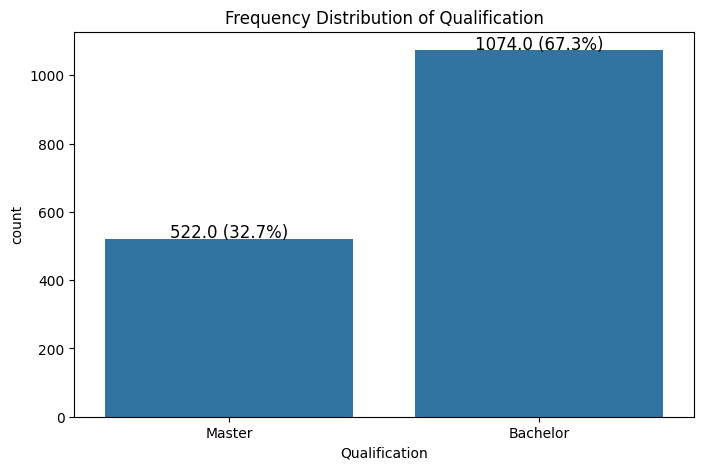

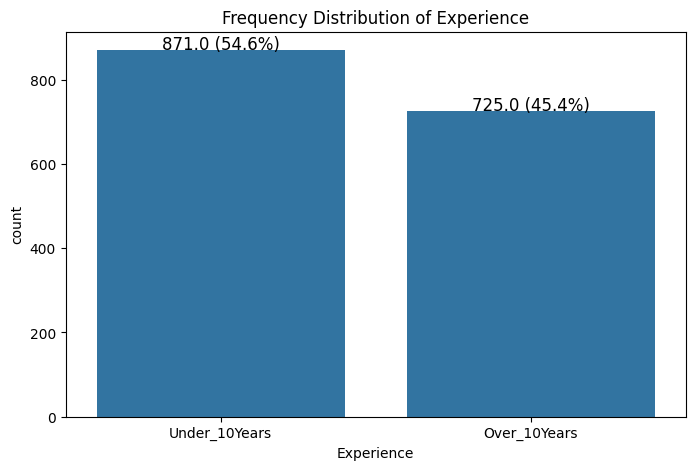

In [5]:
n = df.shape[0]
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sex', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{height} ({height / n * 100:.1f}%)',
            ha='center', fontsize=12)
plt.title("Frequency Distribution of Sex")
plt.show()
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Qualification', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{height} ({height / n * 100:.1f}%)',
            ha='center', fontsize=12)
plt.title("Frequency Distribution of Qualification")
plt.show()
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Experience', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2, f'{height} ({height / n * 100:.1f}%)',
            ha='center', fontsize=12)
plt.title("Frequency Distribution of Experience")
plt.show()

In [6]:
df['Total_Score'] = df[['Score1', 'Score2', 'Score3', 'Score4', 'Score5', 'Score6', 'Score7', 'Score8',
                        'Score9', 'Score10', 'Score11', 'Score12', 'Score13', 'Score14', 'Score15', 'Score16',
                        'Score17', 'Score18', 'Score19', 'Score20', 'Score21', 'Score22', 'Score23', 'Score24',
                        'Score25', 'Score26', 'Score27']].sum(axis=1)
mean_score = df['Total_Score'].mean()
std_dev_score = df['Total_Score'].std()
scale_mean = 67.5
n = df.shape[0]
total_score_sum = df['Total_Score'].sum()
print(f"Dexterity Level of Test Construction")
print(f"Variable       n = {n}        Sum = {total_score_sum}       Mean = {mean_score:.2f} ± {std_dev_score:.2f}    Scale Mean = {scale_mean}   Verdict")
if mean_score < scale_mean:
    verdict = "Low"
else:
    verdict = "High"
print(f"Verdict: {verdict}")

Dexterity Level of Test Construction
Variable       n = 1596        Sum = 91808       Mean = 57.52 ± 16.95    Scale Mean = 67.5   Verdict
Verdict: Low


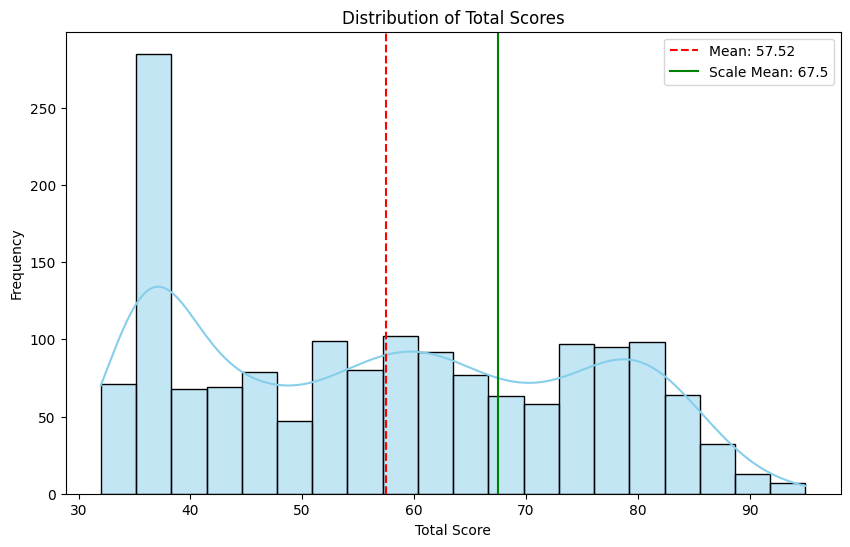

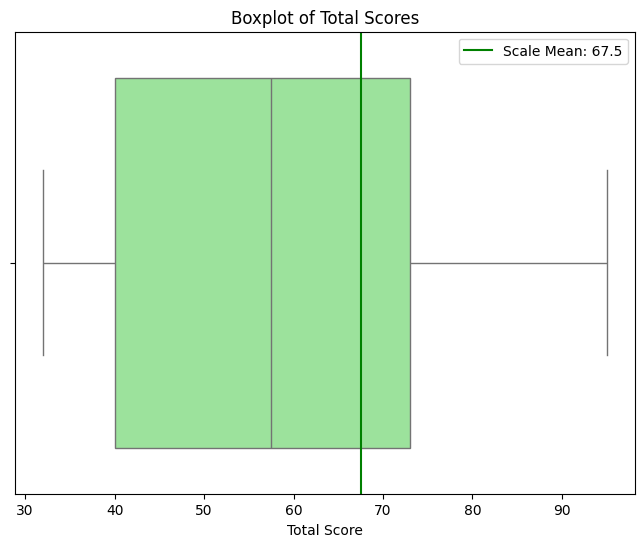

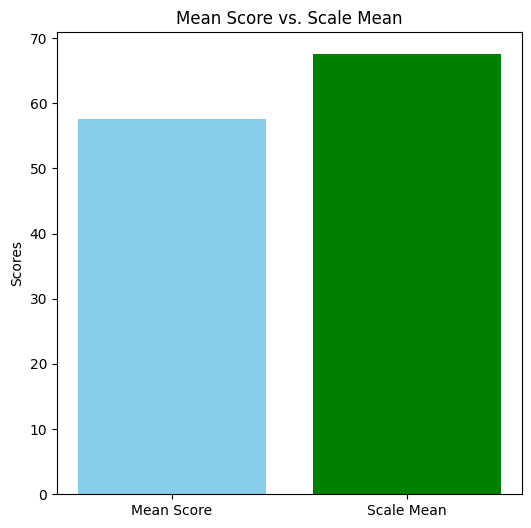

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Score'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.axvline(scale_mean, color='green', linestyle='-', label=f'Scale Mean: {scale_mean}')
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total_Score'], color='lightgreen')
plt.axvline(scale_mean, color='green', linestyle='-', label=f'Scale Mean: {scale_mean}')
plt.title("Boxplot of Total Scores")
plt.xlabel("Total Score")
plt.legend()
plt.show()
plt.figure(figsize=(6, 6))
verdict_data = [mean_score, scale_mean]
labels = ['Mean Score', 'Scale Mean']
colors = ['skyblue', 'green']
plt.bar(labels, verdict_data, color=colors)
plt.title("Mean Score vs. Scale Mean")
plt.ylabel("Scores")
plt.show()

In [8]:
bachelor_scores = df[df['Qualification'] == "Bachelor"]['Total_Score']
master_scores = df[df['Qualification'] == "Master"]['Total_Score']
print(f"Bachelor scores:\n{bachelor_scores.head()}")
print(f"Master scores:\n{master_scores.head()}")
levene_stat, levene_p = levene(bachelor_scores, master_scores)
print("Levene's Test for Equality of Variances:")
print(f"Statistic: {levene_stat:.4f}, P-Value: {levene_p:.4f}")
if levene_p > 0.05:
    print("Equal variance is assumed (p > 0.05).")
    equal_var = True
else:
    print("Equal variance is NOT assumed (p ≤ 0.05).")
    equal_var = False
t_stat, p_value = ttest_ind(bachelor_scores, master_scores, equal_var=equal_var)
if equal_var:
    df_value = bachelor_scores.shape[0] + master_scores.shape[0] - 2
else:
    df_value = None
print("\nIndependent Samples t-test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if equal_var:
    print(f"Degrees of Freedom (Equal Variance): {df_value}")
else:
    print("Degrees of Freedom (Welch's t-test): Calculated internally by ttest_ind")
alpha = 0.05
if p_value < alpha:
    print("Conclusion: A significant dissimilarity exists in Total_Score based on Qualification.")
else:
    print("Conclusion: No significant dissimilarity exists in Total_Score based on Qualification.")

Bachelor scores:
1    57
3    55
4    63
5    68
8    52
Name: Total_Score, dtype: int64
Master scores:
0     50
2     54
6     68
7     60
13    61
Name: Total_Score, dtype: int64
Levene's Test for Equality of Variances:
Statistic: 2.3624, P-Value: 0.1245
Equal variance is assumed (p > 0.05).

Independent Samples t-test Results:
T-Statistic: 0.0391
P-Value: 0.9688
Degrees of Freedom (Equal Variance): 1594
Conclusion: No significant dissimilarity exists in Total_Score based on Qualification.


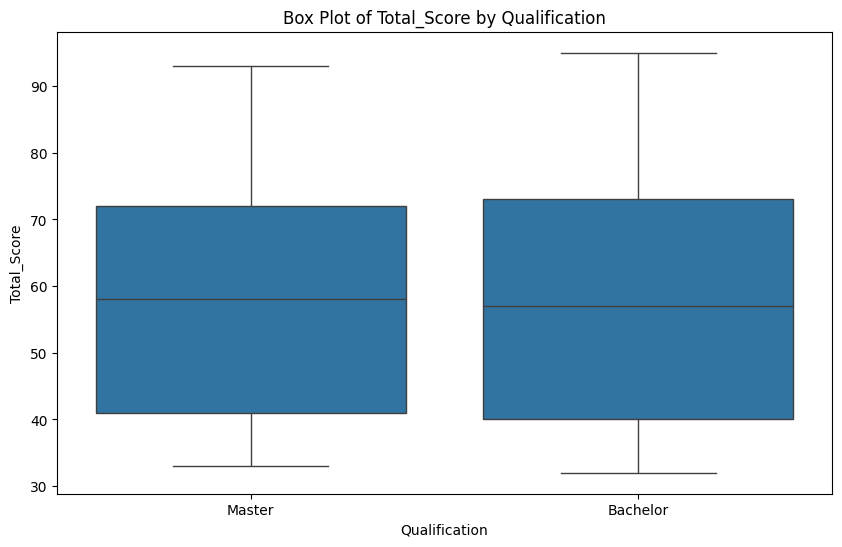

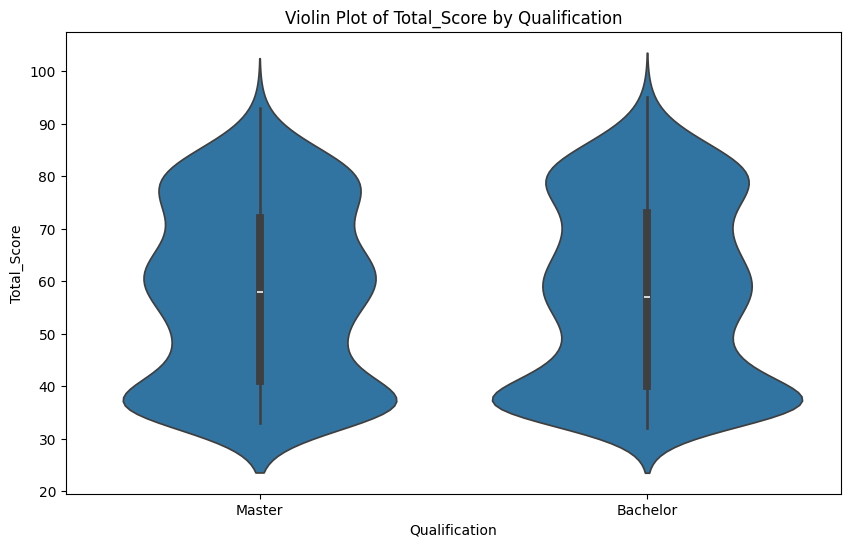

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Qualification', y='Total_Score', data=df)
plt.title('Box Plot of Total_Score by Qualification')
plt.xlabel('Qualification')
plt.ylabel('Total_Score')
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(x='Qualification', y='Total_Score', data=df)
plt.title('Violin Plot of Total_Score by Qualification')
plt.xlabel('Qualification')
plt.ylabel('Total_Score')
plt.show()

In [10]:
under_10_scores = df[df['Experience'] == "Under_10Years"]['Total_Score']
over_10_scores = df[df['Experience'] == "Over_10Years"]['Total_Score']
levene_stat, levene_p = levene(under_10_scores, over_10_scores)
print("Levene's Test for Equality of Variances (Experience):")
print(f"Statistic: {levene_stat:.4f}, P-Value: {levene_p:.4f}")
if levene_p > 0.05:
    print("Equal variance is assumed (p > 0.05).")
    equal_var = True
else:
    print("Equal variance is NOT assumed (p ≤ 0.05).")
    equal_var = False
t_stat, p_value = ttest_ind(under_10_scores, over_10_scores, equal_var=equal_var)
if equal_var:
    df_value = under_10_scores.shape[0] + over_10_scores.shape[0] - 2
else:
    df_value = None
print("\nIndependent Samples t-test Results (Experience):")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if equal_var:
    print(f"Degrees of Freedom (Equal Variance): {df_value}")
else:
    print("Degrees of Freedom (Welch's t-test): Calculated internally by ttest_ind")
alpha = 0.05
if p_value < alpha:
    print("Conclusion: A significant dissimilarity exists in Total_Score based on Experience.")
else:
    print("Conclusion: No significant dissimilarity exists in Total_Score based on Experience.")

Levene's Test for Equality of Variances (Experience):
Statistic: 0.0112, P-Value: 0.9159
Equal variance is assumed (p > 0.05).

Independent Samples t-test Results (Experience):
T-Statistic: -32.5857
P-Value: 0.0000
Degrees of Freedom (Equal Variance): 1594
Conclusion: A significant dissimilarity exists in Total_Score based on Experience.


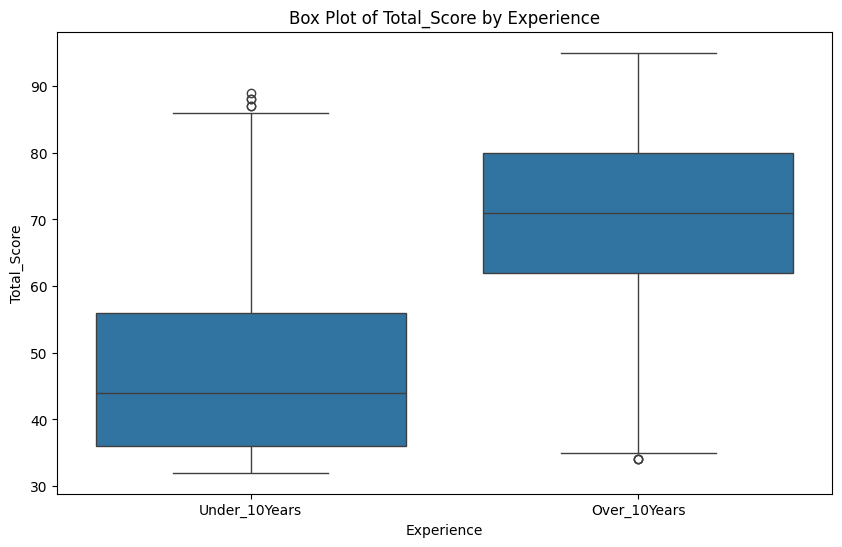

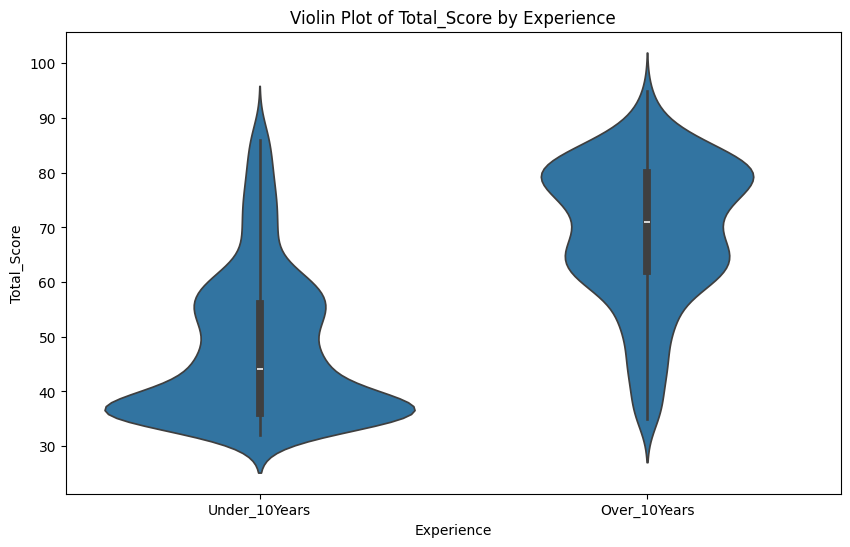

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience', y='Total_Score', data=df)
plt.title('Box Plot of Total_Score by Experience')
plt.xlabel('Experience')
plt.ylabel('Total_Score')
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(x='Experience', y='Total_Score', data=df)
plt.title('Violin Plot of Total_Score by Experience')
plt.xlabel('Experience')
plt.ylabel('Total_Score')
plt.show()

In [12]:
male_scores = df[df['Sex'] == "Male"]['Total_Score']
female_scores = df[df['Sex'] == "Female"]['Total_Score']
levene_stat, levene_p = levene(male_scores, female_scores)
print("Levene's Test for Equality of Variances (Sex):")
print(f"Statistic: {levene_stat:.4f}, P-Value: {levene_p:.4f}")
if levene_p > 0.05:
    print("Equal variance is assumed (p > 0.05).")
    equal_var = True
else:
    print("Equal variance is NOT assumed (p ≤ 0.05).")
    equal_var = False
t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=equal_var)
if equal_var:
    df_value = male_scores.shape[0] + female_scores.shape[0] - 2
else:
    df_value = None
print("\nIndependent Samples t-test Results (Sex):")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if equal_var:
    print(f"Degrees of Freedom (Equal Variance): {df_value}")
else:
    print("Degrees of Freedom (Welch's t-test): Calculated internally by ttest_ind")
alpha = 0.05
if p_value < alpha:
    print("Conclusion: A significant dissimilarity exists in Total_Score based on Sex.")
else:
    print("Conclusion: No significant dissimilarity exists in Total_Score based on Sex.")

Levene's Test for Equality of Variances (Sex):
Statistic: 1.1674, P-Value: 0.2801
Equal variance is assumed (p > 0.05).

Independent Samples t-test Results (Sex):
T-Statistic: 7.6264
P-Value: 0.0000
Degrees of Freedom (Equal Variance): 1594
Conclusion: A significant dissimilarity exists in Total_Score based on Sex.


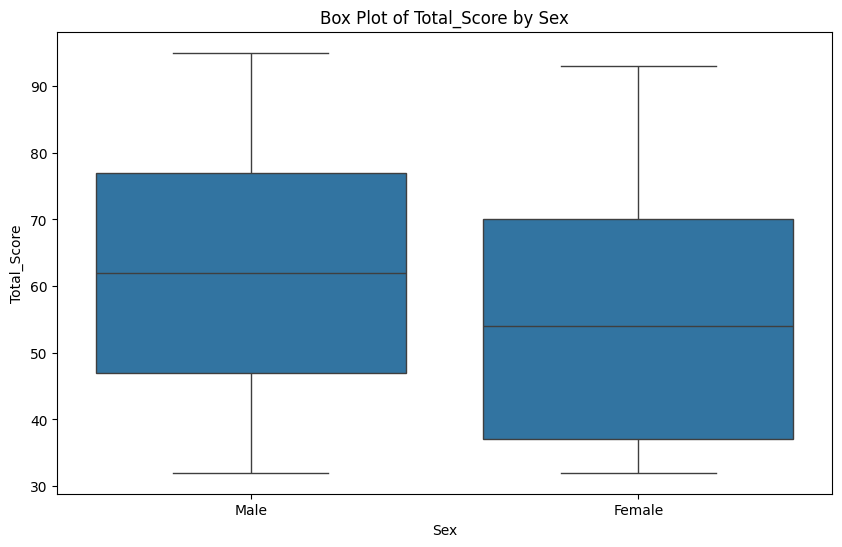

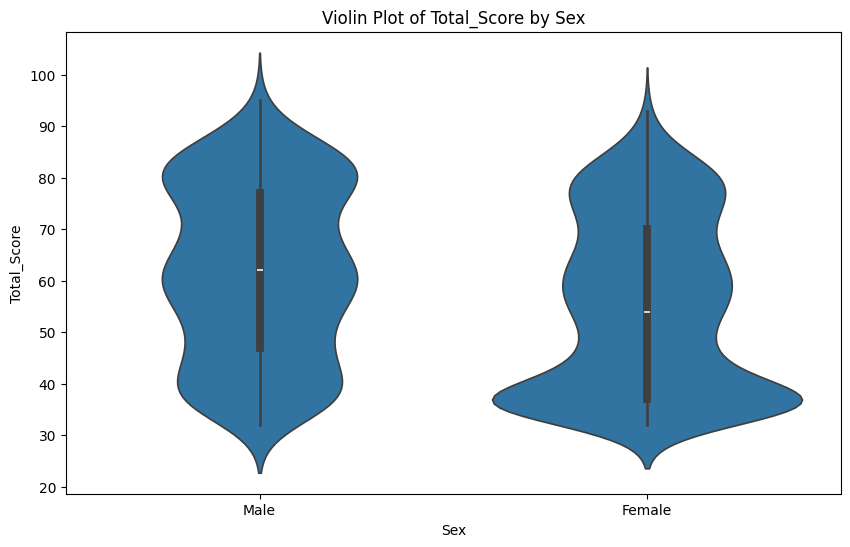

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Total_Score', data=df)
plt.title('Box Plot of Total_Score by Sex')
plt.xlabel('Sex')
plt.ylabel('Total_Score')
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Total_Score', data=df)
plt.title('Violin Plot of Total_Score by Sex')
plt.xlabel('Sex')
plt.ylabel('Total_Score')
plt.show()